<h1 style='font-size: 30px; color: green; font-family: Candara; font-weight: 600'>Effect Size Analysis: Quantifying Relationships and Differences in Data</h1>


Effect size is a statistical measure that quantifies the strength or magnitude of a relationship or difference between variables, providing a standardized way to interpret results. Unlike **p-values**, which only indicate statistical significance, effect size reveals the practical importance of findings, making it an essential tool in research. Common measures include `Cohen's d` for comparing group means, `Pearson’s r` for assessing correlations, and `eta-squared (η²)` or `partial eta-squared (ηp²)` for variance explained in ANOVA. Effect size helps researchers understand the real-world implications of their results, guiding better decision-making and interpretation.

<h3 style='font-size: 25px; color: crimson; font-family: Candara; font-weight: 600'>📌 Import Required Libraries</h3>

In [2]:
from statsmodels.formula.api import ols as smf_ols
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

print('Libraries loaded Succesfully')

Libraries loaded Succesfully


<h3 style='font-size: 25px; color: crimson; font-family: Candara; font-weight: 600'>📌 Import and Preprocessing Dataset</h3>

In [1]:
df = pd.read_csv("Datasets/Iris flower.csv")
df.head()

<IPython.core.display.Javascript object>

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<h4 style='font-size: 25px; color: Green; font-family: Candara; font-weight: 600'>1.2: Dataset Informations/ Overview</h4>

In [7]:
df.shape

(150, 5)

In [8]:
df.columns.tolist()

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'species']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
for col in df.columns:
    Dtypes = df[col].dtypes
    print(f'{col}:', '.' * (80 - len(col) - len(str(Dtypes)) - 2), Dtypes)

sepal length (cm): ...................................................... float64
sepal width (cm): ....................................................... float64
petal length (cm): ...................................................... float64
petal width (cm): ....................................................... float64
species: ................................................................. object


In [11]:
df.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
species               3
dtype: int64

<h4 style='font-size: 25px; color: crimson; font-family: Candara; font-weight: 600'>1.3: Handling Duplicates Values</h4>

In [12]:
df.duplicated().sum()

1

<h4 style='font-size: 25px; color: crimson; font-family: Candara; font-weight: 600'>1.4: Handling Missing Values</h4>

In [13]:
for col in df.columns:
    null_count = df[col].isna().sum()
    print(f'{col}:', '.' * (80 - len(col) - len(str(null_count)) - 2), null_count)

sepal length (cm): ............................................................ 0
sepal width (cm): ............................................................. 0
petal length (cm): ............................................................ 0
petal width (cm): ............................................................. 0
species: ...................................................................... 0


<h4 style='font-size: 25px; color: Green; font-family: Candara; font-weight: 600'>1.5: Handling Outliers Using IQR</h4>

In [14]:
def remove_outliers_iqr(data, columns):
    outlier_counts = {}
    for col in columns:
        Q1 = data[col].quantnile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        outlier_counts[col] = outliers.shape[0]
        data = data[~((data[col] < lower_bound) | (data[col] > upper_bound))]
    return outlier_counts

numerical_columns = df.select_dtypes(include=['number'])
outlier_counts = remove_outliers_iqr(df, numerical_columns)

total_length = 100 
print(f"\n {' ' * 35}Outliers Detected (Count):")
for col, count in outlier_counts.items():
    Text_length = len(col)
    remaining_length = total_length - Text_length - len(str(count)) - 3
    print(f"{col} : {'.' * remaining_length}{count}")


                                    Outliers Detected (Count):
sepal length (cm) : ...............................................................................0
sepal width (cm) : ................................................................................4
petal length (cm) : ...............................................................................0
petal width (cm) : ................................................................................0


<h2 style='font-size: 35px; color: Tomato; font-family: Candara; font-weight: 600'>📌 Statistic Description of The Dataset</h2>

<h4 style='font-size: 25px; color: Green; font-family: Candara; font-weight: 600'>2.1: Overall Statistic Description of The Datasets</h4>

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


<h4 style='font-size: 25px; color: Green; font-family: Candara; font-weight: 600'>2.2: Numerical  Variables Statistics Distributions </h4>

In [30]:
from scipy.stats import skew, kurtosis
def compute_overall_distribution_stats(df):
    results = []
    for col in df.select_dtypes(include=[np.number]).columns:
        mean = df[col].mean()
        median = df[col].median()
        mode = df[col].mode().iloc[0] if not df[col].mode().empty else np.nan
        std_dev = df[col].std()
        variance = df[col].var()
        value_range = df[col].max() - df[col].min()
        skewness_val = skew(df[col], nan_policy='omit')  # Skewness
        kurtosis_val = kurtosis(df[col], nan_policy='omit')  # Kurtosis

       
        results.append({
            'Parameter': col,
            'Mean': mean,
            'Median': median,
            'Mode': mode,
            'Standard Deviation': std_dev,
            'Variance': variance,
            'Range': value_range,
            'Skewness': skewness_val,
            'Kurtosis': kurtosis_val
        })

    
    result_df = pd.DataFrame(results)
    return result_df

result = compute_overall_distribution_stats(df)
result

,Parameter,Mean,Median,Mode,Standard Deviation,Variance,Range,Skewness,Kurtosis
0,sepal length (cm),5.843333,5.80,5.0,0.828066,0.685694,3.6,0.311753,-0.573568
1,sepal width (cm),3.057333,3.00,3.0,0.435866,0.189979,2.4,0.315767,0.180976
2,petal length (cm),3.758000,4.35,1.4,1.765298,3.116278,5.9,-0.272128,-1.395536
3,petal width (cm),1.199333,1.30,0.2,0.762238,0.581006,2.4,-0.101934,-1.336067


<h4 style='font-size: 25px; color: Green; font-family: Candara; font-weight: 600'>2.3: Group-wise  Variables Statistics </h4>

In [31]:
def summary_stats(df, Metrics, group=None):
    df_without_location = df.drop(columns=[group])
    grand_mean = df_without_location[Metrics].mean()
    sem = df_without_location[Metrics].sem()
    cv = df_without_location[Metrics].std() / df_without_location[Metrics].mean() * 100
    grouped = df.groupby(group)[Metrics].agg(['mean', 'sem']).reset_index()
    
    summary_df = pd.DataFrame()
    for col in Metrics:
        summary_df[col] = grouped.apply(
            lambda x: f"{x[(col, 'mean')]:.2f} ± {x[(col, 'sem')]:.2f}", axis=1
        )
    
    summary_df.insert(0, group, grouped[group])
    grand_mean_row = ['Grand Mean'] + grand_mean.tolist()
    sem_row = ['SEM'] + sem.tolist()
    cv_row = ['%CV'] + cv.tolist()
    
    summary_df.loc[len(summary_df)] = grand_mean_row
    summary_df.loc[len(summary_df)] = sem_row
    summary_df.loc[len(summary_df)] = cv_row
    
    return summary_df



Metrics = df.select_dtypes(include=np.number).columns.tolist()
Variables_stats_by_species = summary_stats(df, Metrics, group='species')
Variables_stats_by_species

,species,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,setosa,5.01 ± 0.05,3.43 ± 0.05,1.46 ± 0.02,0.25 ± 0.01
1,versicolor,5.94 ± 0.07,2.77 ± 0.04,4.26 ± 0.07,1.33 ± 0.03
2,virginica,6.59 ± 0.09,2.97 ± 0.05,5.55 ± 0.08,2.03 ± 0.04
3,Grand Mean,5.843333,3.057333,3.758,1.199333
4,SEM,0.067611,0.035588,0.144136,0.062236
5,%CV,14.171126,14.25642,46.974407,63.555114


<h4 style='font-size: 25px; color: Green; font-family: Candara; font-weight: 600'>2.4: Categorical  Variables Statistics Distributions </h4>

In [32]:
categories = ['species']
total_length = 100

for category in categories:
    print(f"\n{' ' * 35}Count occurrences of each {category}:")
    counts = df[category].value_counts()
    proportions = df[category].value_counts(normalize=True)
    for value, count in counts.items():
        proportion = proportions[value]
        text_length = len(f"{category}: {value}")
        remaining_length = total_length - text_length - len(str(count)) - len(f"{proportion:.2%}") - 3
        print(f"{category}: {value} {'.' * remaining_length} {count} ({proportion:.2%})")


                                   Count occurrences of each species:
species: setosa .......................................................................... 50 (33.33%)
species: versicolor ...................................................................... 50 (33.33%)
species: virginica ....................................................................... 50 (33.33%)


<h2 style='font-size: 35px; color: Tomato; font-family: Candara; font-weight: 600'>📌 Exploration of Data Distribution</h2>

<h3 style='font-size: 25px; color: Crimson; font-family: Candara; font-weight: 600'>3.1: Histogram (Frequency Distributions)</h3>

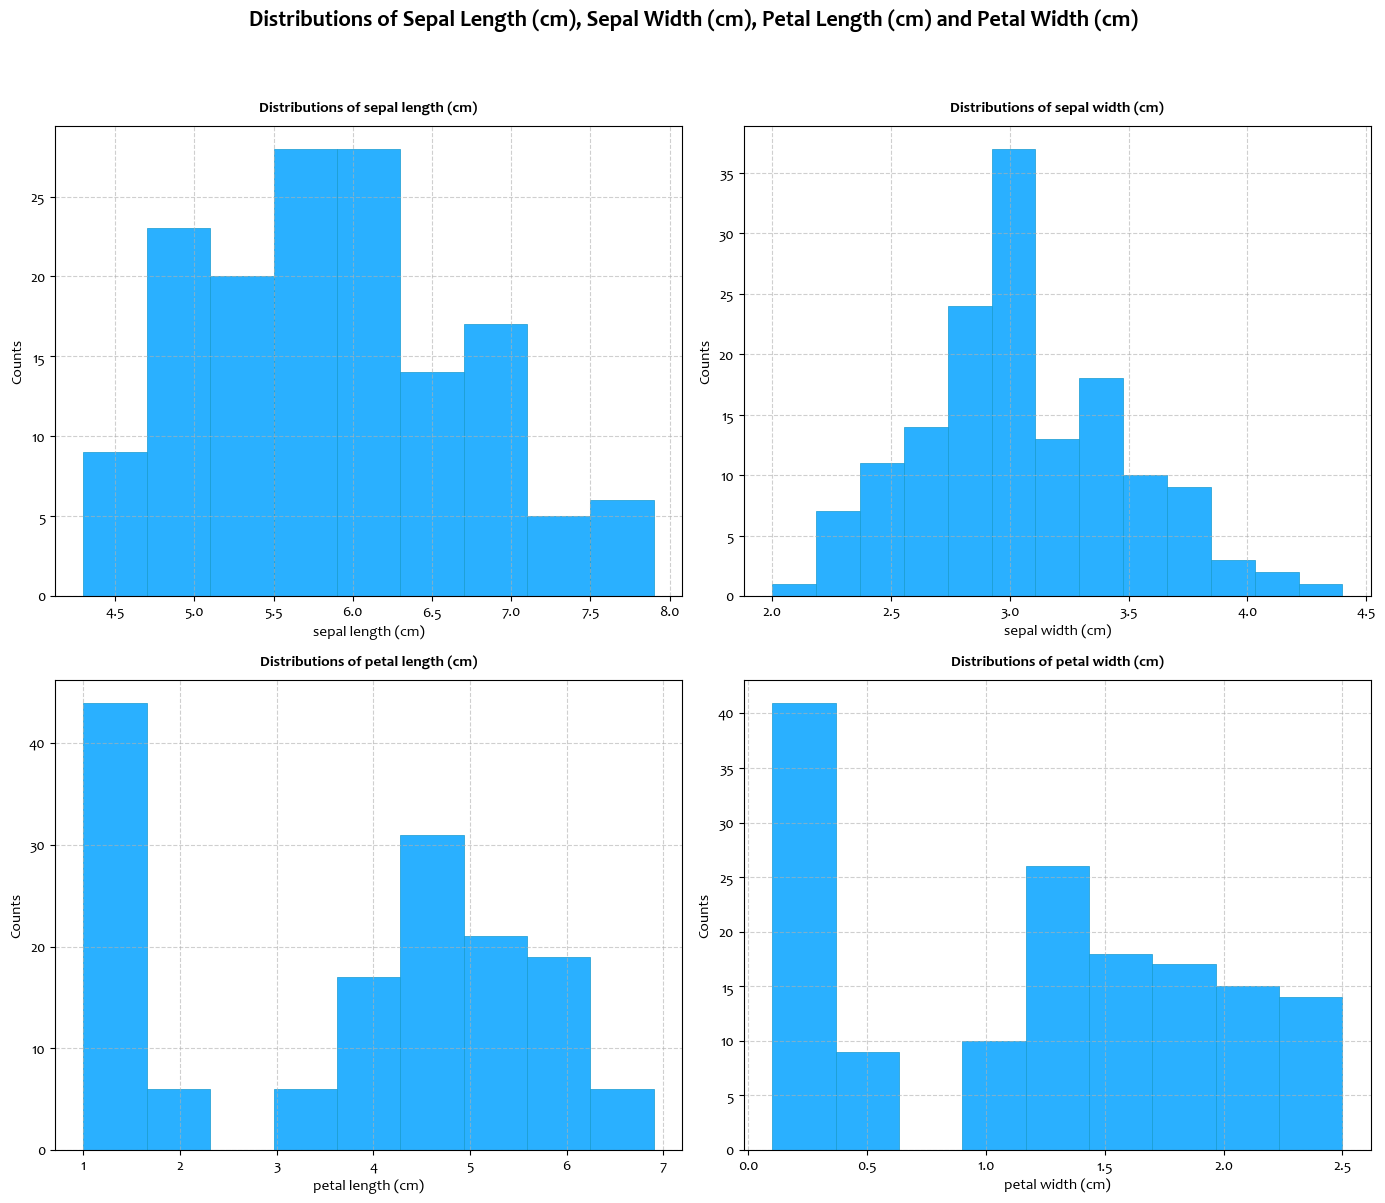

In [33]:
num_variables = len(Metrics)
rows = math.ceil(num_variables / 3)
cols = min(num_variables, 2)


fig, axes = plt.subplots(rows, cols, figsize=(14, 6 * rows))
plt.rcParams.update({'font.family': 'Candara', 'font.style': 'normal', 'font.size': 11 })
fig.suptitle('Distributions of Sepal Length (cm), Sepal Width (cm), Petal Length (cm) and Petal Width (cm)', fontsize=16, fontweight='bold', y=1)
axes = axes.flatten() if num_variables > 1 else [axes]


for idx, column in enumerate(Metrics):
    sns.histplot(df[column], fill=True, ax=axes[idx], facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)   
    axes[idx].set_title(f"Distributions of {column}", fontsize=11, pad=10, fontweight='bold')
    axes[idx].set_xlabel(column, fontsize=11)
    axes[idx].set_ylabel('Counts', fontsize=11)
    axes[idx].grid(linestyle='--', alpha=0.6)

# Remove empty subplots if any
for idx in range(num_variables, len(axes)):
    fig.delaxes(axes[idx])
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig(f"Visualizations/Histogram.png")
plt.show()

<h3 style='font-size: 25px; color: Tomato; font-family: Candara; font-weight: 600'>3.2: Barplot (Mean Comparisons)</h3>

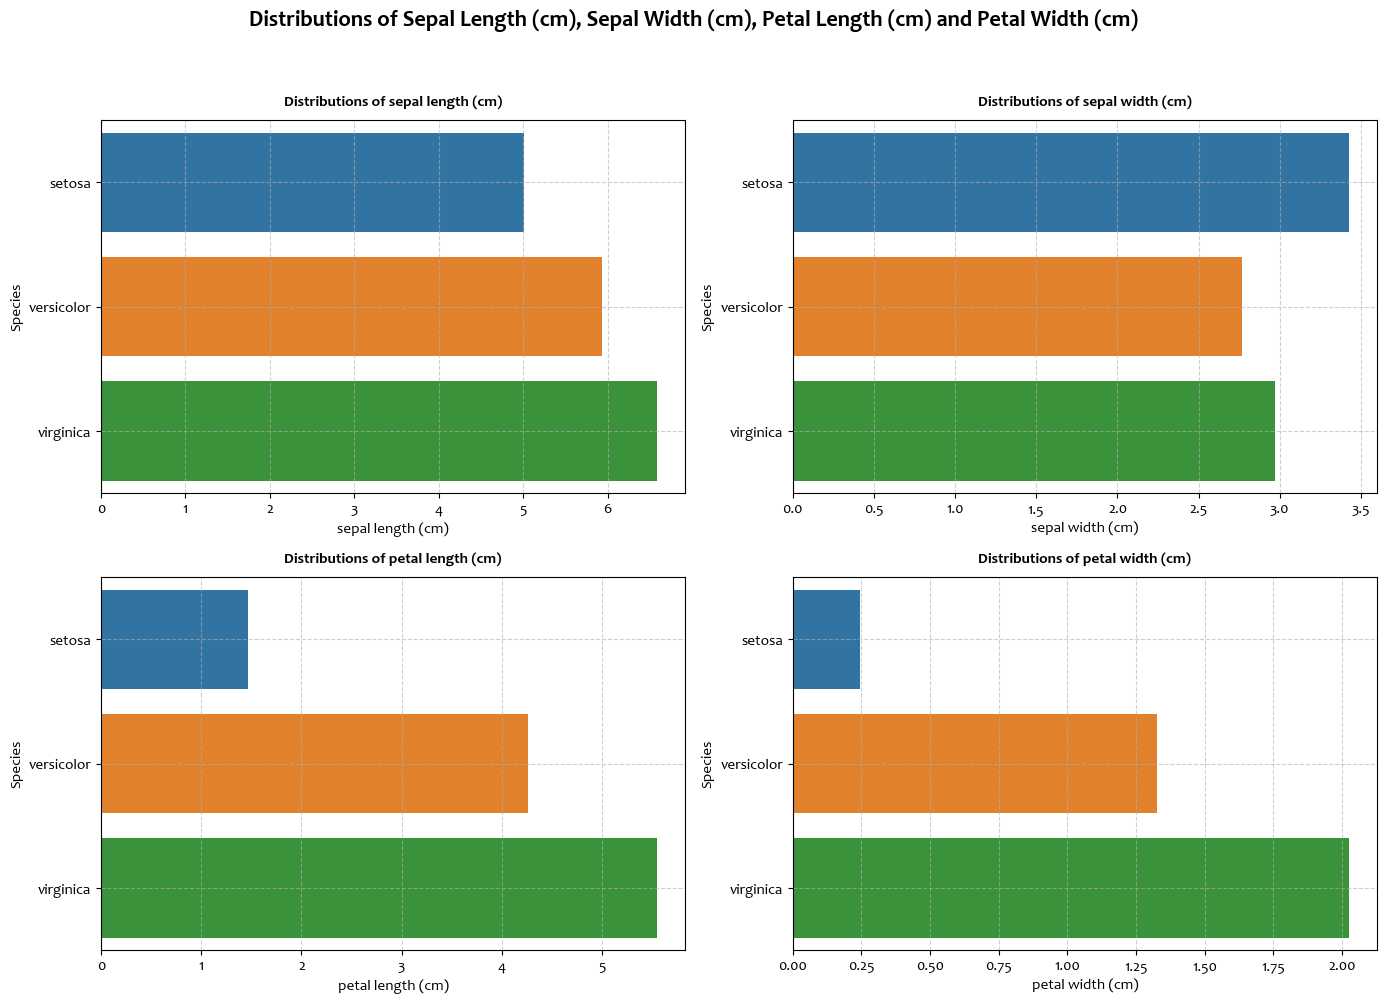

In [34]:
num_variables = len(Metrics)
rows = math.ceil(num_variables / 3)
cols = min(num_variables, 2)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows))
plt.rcParams.update({'font.family': 'Candara', 'font.style': 'normal', 'font.size': 11 })
fig.suptitle('Distributions of Sepal Length (cm), Sepal Width (cm), Petal Length (cm) and Petal Width (cm)', fontsize=16, fontweight='bold', y=1)
axes = axes.flatten() if num_variables > 1 else [axes]


for idx, column in enumerate(Metrics):
    sns.barplot(data=df, x=df[column],y=df['species'], fill=True, hue="species", ax=axes[idx],errorbar=None)   
    axes[idx].set_title(f"Distributions of {column}", fontsize=11, pad=10, fontweight='bold')
    axes[idx].set_xlabel(column, fontsize=11)
    axes[idx].set_ylabel('Species', fontsize=11)
    axes[idx].grid(linestyle='--', alpha=0.6)

# Remove empty subplots if any
for idx in range(num_variables, len(axes)):
    fig.delaxes(axes[idx])
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig(f"Visualizations/Barplot.png")
plt.show()

<h3 style='font-size: 25px; color: Tomato; font-family: Candara; font-weight: 600'>3.3: Boxplot (Distributions Comparisons, and Outlier Detections)</h3>

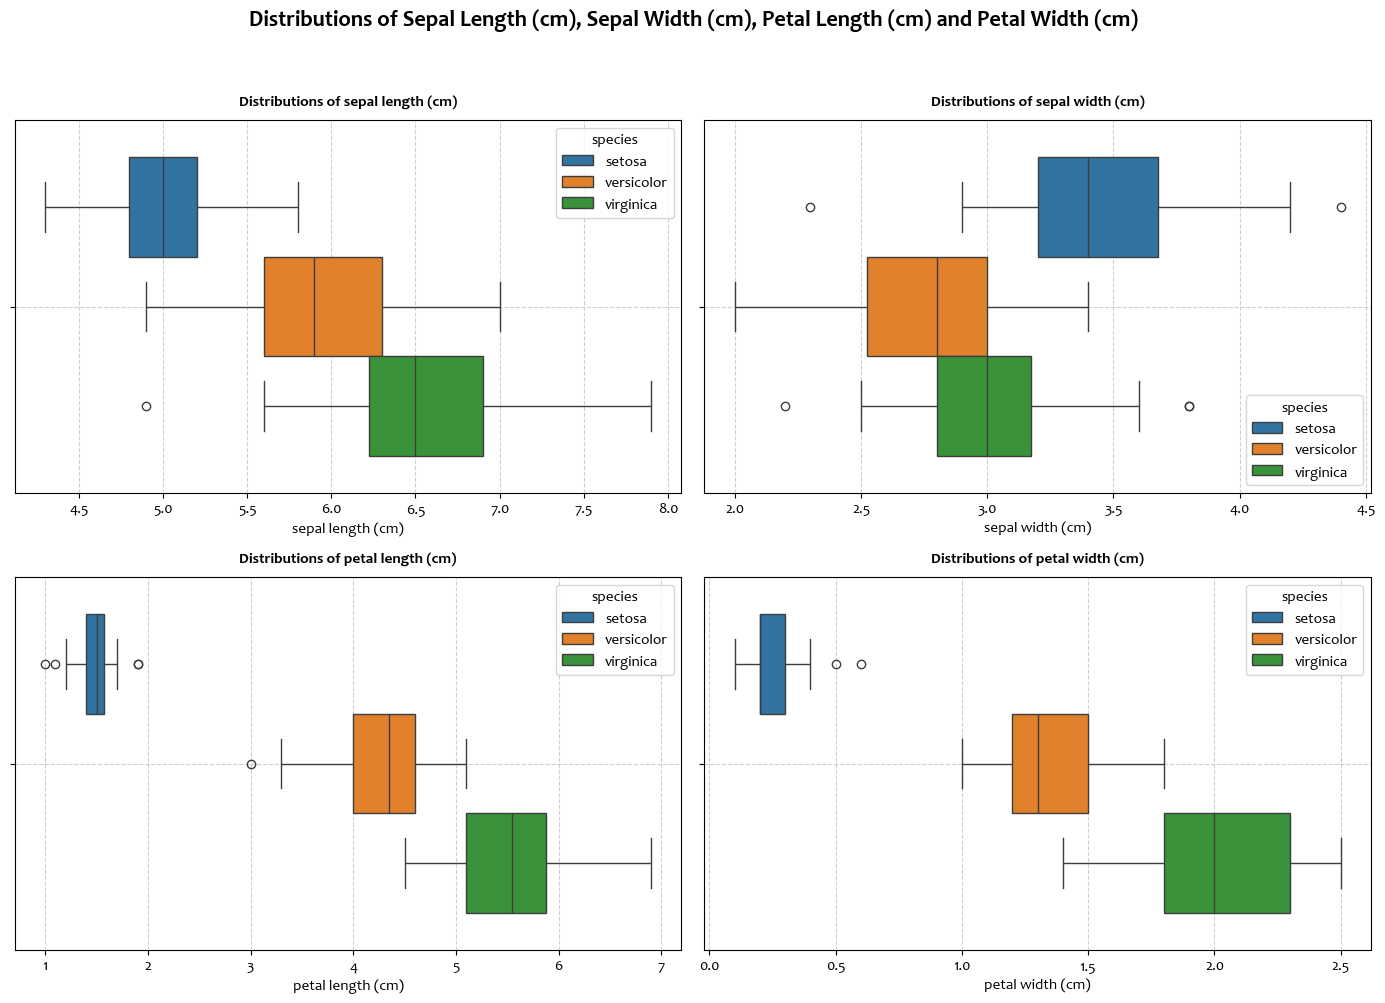

In [22]:
num_variables = len(Metrics)
rows = math.ceil(num_variables / 3)
cols = min(num_variables, 2)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows))
fig.suptitle('Distributions of Sepal Length (cm), Sepal Width (cm), Petal Length (cm) and Petal Width (cm)', fontsize=16, fontweight='bold', y=1)
axes = axes.flatten() if num_variables > 1 else [axes]


for idx, column in enumerate(Metrics):
    sns.boxplot(data=df, x=df[column], hue="species", ax=axes[idx])   
    axes[idx].set_title(f"Distributions of {column}", fontsize=11, pad=10, fontweight='bold')
    axes[idx].set_xlabel(column, fontsize=11)
    axes[idx].grid(linestyle='--', alpha=0.6)

# Remove empty subplots if any
for idx in range(num_variables, len(axes)):
    fig.delaxes(axes[idx])
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig(f"Visualizations/Boxplot.png")
plt.show()

<h3 style='font-size: 25px; color: Tomato; font-family: Candara; font-weight: 600'>3.4: Stripplots for Datapoints Explorations</h3>

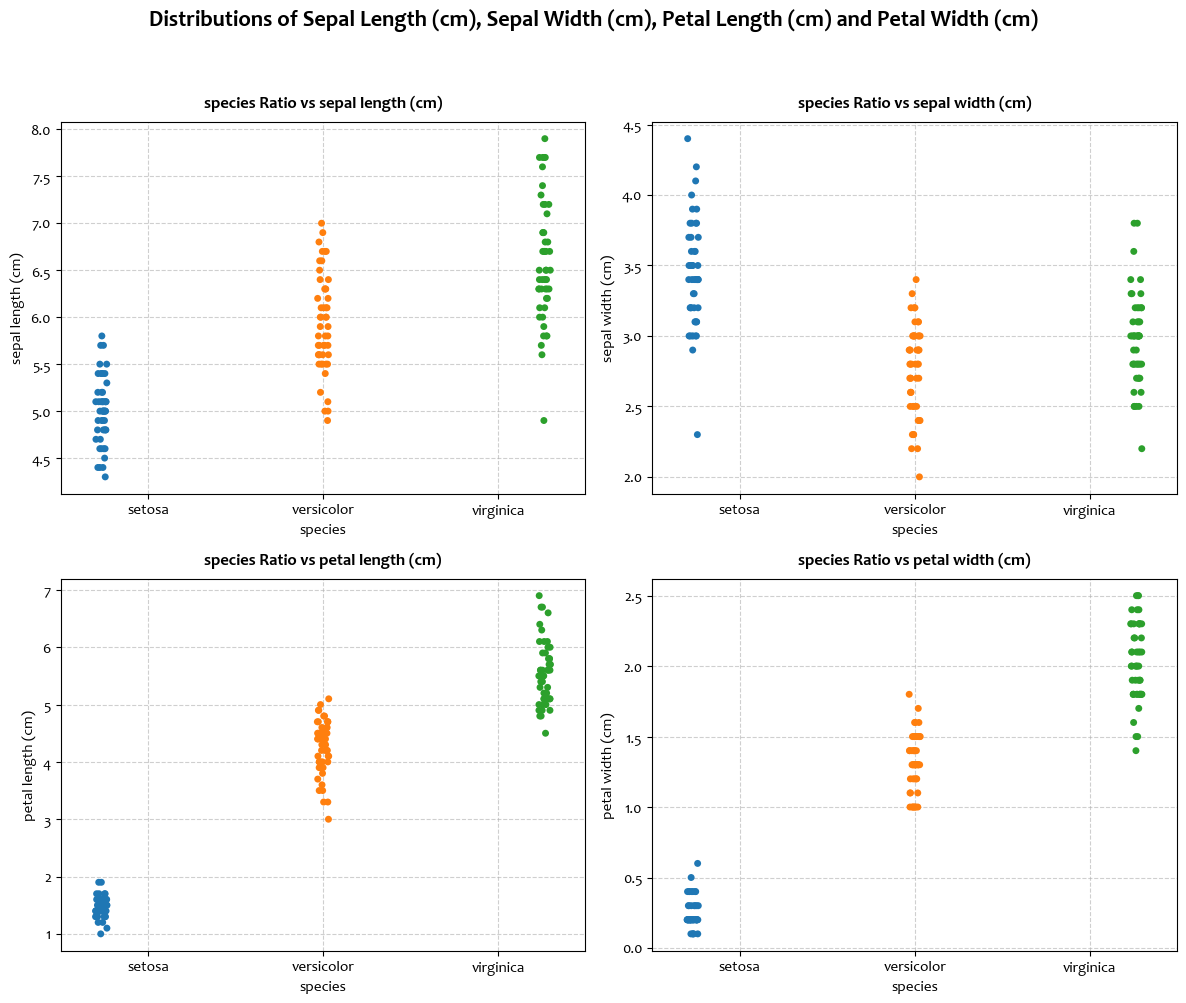

In [23]:
num_variables = len(Metrics)
rows = math.ceil(num_variables / 3)
cols = min(num_variables, 2)

fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))
fig.suptitle('Distributions of Sepal Length (cm), Sepal Width (cm), Petal Length (cm) and Petal Width (cm)', fontsize=16, fontweight='bold', y=1)

axes = axes.flatten() if num_variables > 1 else [axes]
for idx, column in enumerate(Metrics):
    sns.stripplot(x='species', y=column, hue='species', data=df, ax=axes[idx], dodge=True)
    axes[idx].set_title(f"species Ratio vs {column}", fontsize=12, pad=10, fontweight='bold')
    axes[idx].set_xlabel('species', fontsize=11)
    axes[idx].set_ylabel(column, fontsize=11)
    axes[idx].grid(linestyle='--', alpha=0.6)

for idx in range(num_variables, len(axes)):
    fig.delaxes(axes[idx])
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig(f"Visualizations/Sripplot.png")

plt.show()

<h3 style='font-size: 25px; color: Tomato; font-family: Candara; font-weight: 600'>3.5: Kernel Density Estimation Plots (KDE)</h3>

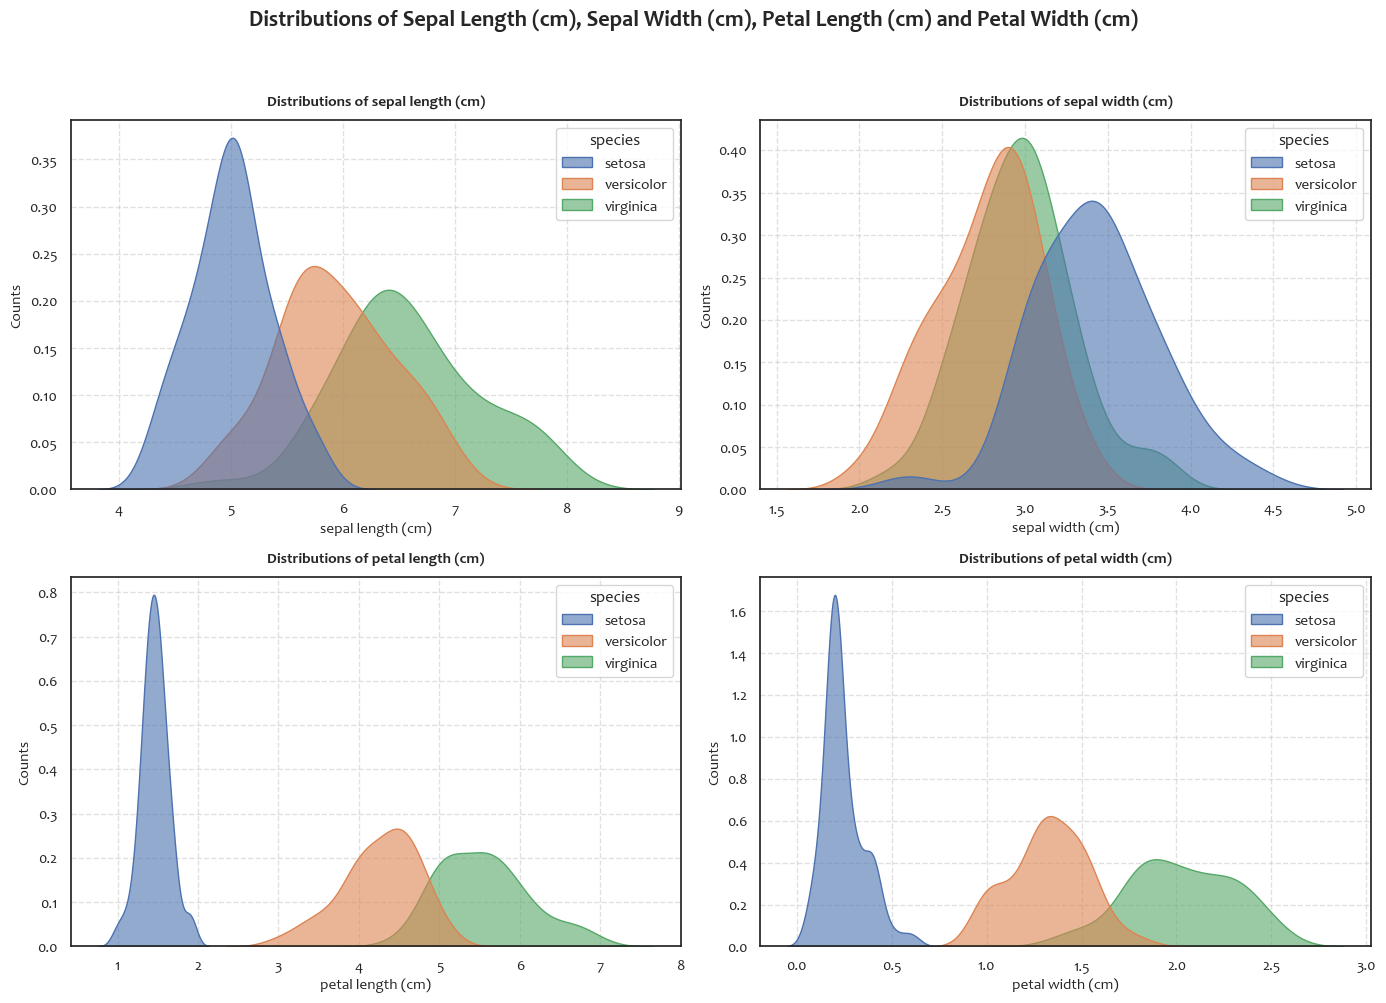

In [328]:
num_variables = len(Metrics)
rows = math.ceil(num_variables / 3)
cols = min(num_variables, 2)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows))
fig.suptitle('Distributions of Sepal Length (cm), Sepal Width (cm), Petal Length (cm) and Petal Width (cm)', fontsize=16, fontweight='bold', y=1)
axes = axes.flatten() if num_variables > 1 else [axes]


for idx, column in enumerate(Metrics):
    sns.kdeplot(data=df, x=df[column], fill=True, hue="species", ax=axes[idx], alpha=0.6)   
    axes[idx].set_title(f"Distributions of {column}", fontsize=11, pad=10, fontweight='bold')
    axes[idx].set_xlabel(column, fontsize=11)
    axes[idx].set_ylabel('Counts', fontsize=11)
    axes[idx].grid(linestyle='--', alpha=0.6)

# Remove empty subplots if any
for idx in range(num_variables, len(axes)):
    fig.delaxes(axes[idx])
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig(f"Visualizations/Kernel Density Estimation Plots (KDE) 002.png")
plt.show()

<h3 style='font-size: 25px; color: Tomato; font-family: Candara; font-weight: 600'>3.6: Q-Q Plot</h3>

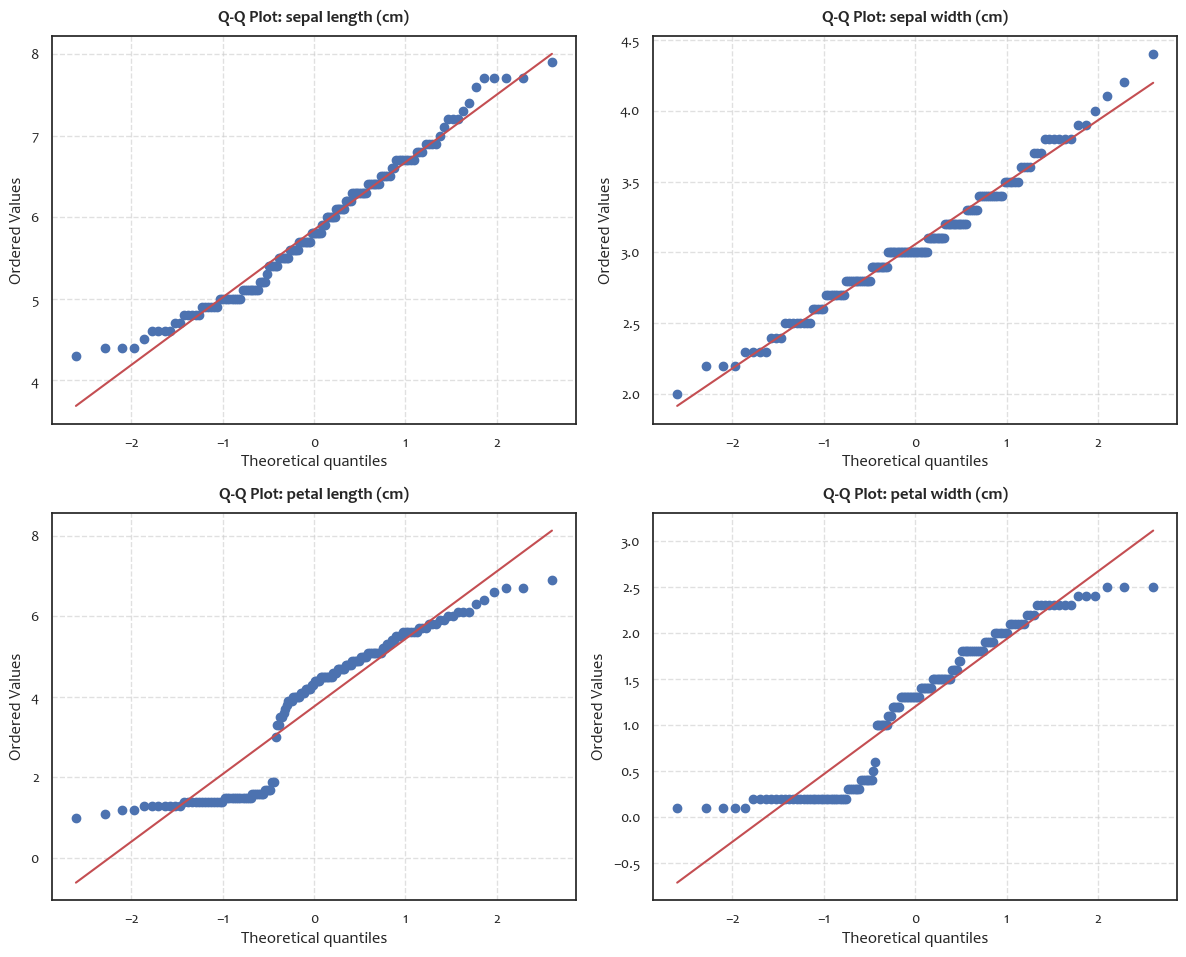

In [329]:
num_variables = len(Metrics)
rows = math.ceil(num_variables / 3)
cols = min(num_variables, 2)

fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))
axes = axes.flatten() if num_variables > 1 else [axes]

for idx, column in enumerate(Metrics):
    stats.probplot(df[column].dropna(), dist="norm", plot=axes[idx])
    axes[idx].set_title(f"Q-Q Plot: {column}", fontsize=12, pad=10, fontweight='bold')
    axes[idx].grid(linestyle='--', alpha=0.6)

for idx in range(num_variables, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig(f"Visualizations/Q-Q Plot.png")
plt.show()

<h1 style='font-size: 35px; color: Green; font-family: Candara; font-weight: 600'>📌 Effect size calculation</h1>

 - Calculate the effect size  to quantify the magnitude of differences between the control and biopesticide-treated groups.  
 - Evaluate both statistical significance and practical significance to assess the real-world impact of each biopesticide.  

<h2 style='font-size: 25px; color: Green; font-family: Candara; font-weight: 600'>4.1: Pearson’s (r)</h2>

**Pearson’s r**: This measures the strength and direction of the linear relationship between two continuous variables. Values range from -1 to 1, with 0 indicating no relationship, 1 indicating a perfect positive relationship, and -1 indicating a perfect negative relationship.

In [25]:
from scipy.stats import pearsonr
def compute_pearson_r(df):
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    results = []

    for i, col1 in enumerate(numerical_columns):
        for col2 in numerical_columns[i+1:]:
            r_value, p_value = pearsonr(df[col1], df[col2])

            direction = ("Positive" if r_value > 0 else 
                         "Negative" if r_value < 0 else "No correlation")
            strength = ("Strong" if abs(r_value) >= 0.7 else 
                        "Moderate" if abs(r_value) >= 0.3 else "Weak")

            results.append({
                'Variable 1': col1, 'Variable 2': col2,
                'Pearson\'s r': r_value, 'P-value': p_value,
                'Direction': direction, 'Strength': strength
            })
    
    return pd.DataFrame(results)

# Compute and return the Pearson's r results as a DataFrame
pearson_results_df = compute_pearson_r(df)
pearson_results_df

,Variable 1,Variable 2,Pearson's r,P-value,Direction,Strength
0,sepal length (cm),sepal width (cm),-0.117570,1.518983e-01,Negative,Weak
1,sepal length (cm),petal length (cm),0.871754,1.038667e-47,Positive,Strong
2,sepal length (cm),petal width (cm),0.817941,2.325498e-37,Positive,Strong
3,sepal width (cm),petal length (cm),-0.428440,4.513314e-08,Negative,Moderate
4,sepal width (cm),petal width (cm),-0.366126,4.073229e-06,Negative,Moderate
5,petal length (cm),petal width (cm),0.962865,4.675004e-86,Positive,Strong


<span style='font-size: 15px; color: Green; font-family: Dubai; font-weight: 600'>How to Interpret Pearson's r Results</span>

Pearson's r measures the strength and direction of the linear relationship between two continuous variables. Here's how you can interpret the results:


<span style='font-size: 15px; color: Green; font-family: Dubai; font-weight: 600'>1. Value of Pearson's r</span>

- **-1 to -0.7**: Strong negative correlation  → As one variable increases, the other decreases significantly in a linear fashion.
- **-0.7 to -0.3**: Moderate negative correlation  → As one variable increases, the other decreases moderately.
- **-0.3 to 0.0**: Weak negative correlation   → Minimal inverse relationship between the variables.
- **0.0**: No correlation   → No linear relationship between the variables.
- **0.0 to 0.3**: Weak positive correlation   → Minimal direct relationship between the variables.
- **0.3 to 0.7**: Moderate positive correlation   → As one variable increases, the other increases moderately.
- **0.7 to 1.0**: Strong positive correlation  → As one variable increases, the other increases significantly in a linear fashion.


<span style='font-size: 15px; color: Green; font-family: Dubai; font-weight: 600'>2. P-Value</span>

- **p < 0.05**: The correlation is statistically significant, meaning it is unlikely to have occurred by chance.
- **p ≥ 0.05**: The correlation is not statistically significant, suggesting the relationship might be due to random variation.


<span style='font-size: 15px; color: Green; font-family: Dubai; font-weight: 600'>3. Direction of Correlation</span>

- **Positive Correlation**: As one variable increases, the other variable also increases.
- **Negative Correlation**: As one variable increases, the other variable decreases.
- **No Correlation**: Changes in one variable do not predict changes in the other variable.


<span style='font-size: 15px; color: Green; font-family: Dubai; font-weight: 600'>4. Strength of Correlation</span>

The strength describes how closely the data points lie on a straight line:
- **Strong Correlation**: Data points are tightly clustered around the regression line.
- **Moderate Correlation**: Data points are moderately scattered around the regression line.
- **Weak Correlation**: Data points are widely scattered and may not follow a clear linear trend.


<span style='font-size: 15px; color: Green; font-family: Dubai; font-weight: 600'>Use in Practice</span>

- **Weak Correlations** (|r| < 0.3): Might not be meaningful for practical applications, especially if p ≥ 0.05.
- **Strong Correlations** (|r| ≥ 0.7): Suggest a meaningful linear relationship that can guide predictions or decision-making.
- **Statistical Significance**: Even a strong correlation may not imply causation—other factors or confounders should be considered.

<h2 style='font-size: 25px; color: Green; font-family: Candara; font-weight: 600'>4.2: Partial Eta-squared (ηp²))</h2>

**Partial Eta-squared (ηp²)** is a measure of effect size that quantifies the proportion of the total variance in the dependent variable that is attributed to a particular independent variable (or factor), while controlling for the influence of other variables. This is useful in an analysis of variance (ANOVA) context, especially when multiple factors are involved.

In [35]:
def compute_partial_eta_squared(df, numerical_columns, Factors):
    results = []
    for column in numerical_columns:
        
        for factor in Factors:
            safe_column_name = column.replace("(", "").replace(")", "").replace("/", "").replace(" ", "_")
            df = df.rename(columns={column: safe_column_name})
            formula = f'{safe_column_name} ~ C({factor})'
            model = ols(formula, data=df).fit()
            anova_results = anova_lm(model, typ=2)
            SS_factor = anova_results['sum_sq'][f'C({factor})']
            SS_error = anova_results['sum_sq']['Residual']
            partial_eta_squared = SS_factor / (SS_factor + SS_error)
            
            results.append({
                "Variables": column,
                "Factor": factor,
                "Partial Eta-squared (ηp²)": partial_eta_squared
            })
    

    eta_squared_df = pd.DataFrame(results)
    
    def interpret_eta_squared(eta_squared):
        if eta_squared >= 0.14: return "Large effect size (≥ 14%)"
        elif eta_squared >= 0.06: return "Medium effect size (6% - 14%)"
        else: return "Small effect size (< 6%)"
    eta_squared_df['Interpretation'] = eta_squared_df['Partial Eta-squared (ηp²)'].apply(interpret_eta_squared)
    return eta_squared_df


eta_squared_df = compute_partial_eta_squared(df, Metrics, Factors=['species'])
eta_squared_df

,Variables,Factor,Partial Eta-squared (ηp²),Interpretation
0,sepal length (cm),species,0.618706,Large effect size (≥ 14%)
1,sepal width (cm),species,0.400783,Large effect size (≥ 14%)
2,petal length (cm),species,0.941372,Large effect size (≥ 14%)
3,petal width (cm),species,0.928883,Large effect size (≥ 14%)


<span style='font-size: 15px; color: Green; font-family: Dubai; font-weight: 600'>General Interpretation of Partial Eta-squared (ηp²) </span>

- ``Small effect size (ηp² < 0.01)``:  A very small proportion of the variance is explained by the factor. This suggests that the factor has a negligible effect on the outcome variable.
  
- ``Medium effect size (0.01 ≤ ηp² < 0.06)``:  The factor explains a moderate proportion of the variance, indicating a moderate effect on the outcome variable.
  
- ``Large effect size (ηp² ≥ 0.06)``:   A large proportion of the variance in the dependent variable is explained by the factor, suggesting a strong and substantial effect.


<span style='font-size: 15px; color: Green; font-family: Dubai; font-weight: 600'>Considerations</span>

- ``Partial Eta-squared`` is sensitive to the number of levels of the factor and the total variance, so it's important to interpret the effect size in the context of the study and the data.
- For ``multiple factors`` or ``interaction terms``, Partial Eta-squared can help you assess which factors contribute the most to explaining variance, which is crucial in identifying which factors are the most important drivers of the dependent variable.

In summary, Partial Eta-squared allows you to assess the magnitude of the effects of each factor on the dependent variable, helping you to understand which factors have the most significant influence and whether the effects are strong, moderate, or weak.

<h2 style='font-size: 25px; color: Green; font-family: Candara; font-weight: 600'>4.3. Cohen's d</h2>

This is used to measure the difference between two group means in terms of standard deviations. It is often used in t-tests or comparing two independent samples. A small Cohen's d (around 0.2), medium (around 0.5), and large (around 0.8) indicate small, medium, and large effects, respectively.

In [27]:
def cohens_d(group1, group2):
    mean1 = np.mean(group1)
    mean2 = np.mean(group2)
    std1 = np.std(group1, ddof=1)
    std2 = np.std(group2, ddof=1)
    pooled_std = np.sqrt(((std1 ** 2) + (std2 ** 2)) / 2)
    return (mean1 - mean2) / pooled_std

def interpret_cohens_d(d_value):
    if abs(d_value) < 0.2:
        interpretation = "Small effect size"
        explanation = "There is a small difference between the groups, and the effect is minimal."
    elif 0.2 <= abs(d_value) < 0.5:
        interpretation = "Medium effect size"
        explanation = "The difference between the groups is moderate, with noticeable effects."
    elif 0.5 <= abs(d_value) < 0.8:
        interpretation = "Large effect size"
        explanation = "There is a large difference between the groups, with a strong effect."
    else:
        interpretation = "Very large effect size"
        explanation = "The difference between the groups is very large, indicating a very strong effect."
    return interpretation, explanation


def calculate_effect_sizes(df, group_column, numerical_columns):
    effect_size_results = []
    for column in numerical_columns:
        group_values = df[group_column].unique()  # Get unique groups in the 'group_column'
        for i in range(len(group_values)):
            for j in range(i + 1, len(group_values)):  # Ensure each pair is unique
                group1 = df[df[group_column] == group_values[i]][column]
                group2 = df[df[group_column] == group_values[j]][column]
                
                # Calculate Cohen's d for this pair
                d_value = cohens_d(group1, group2)
                interpretation, explanation = interpret_cohens_d(d_value)
                
                # Store results in a list
                effect_size_results.append({
                    'Column': column,
                    'Pair': f'{group_values[i]} vs {group_values[j]}',
                    'Cohen\'s d': d_value,
                    'Interpretation': interpretation,
                    'Explanation': explanation
                })

    # Create a DataFrame from the results
    effect_size_df = pd.DataFrame(effect_size_results)
    return effect_size_df




numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns
effect_sizes_df = calculate_effect_sizes(df, group_column="species", numerical_columns=numerical_columns)
pd.set_option('display.max_colwidth', 120) 
effect_sizes_df.head()

,Column,Pair,Cohen's d,Interpretation,Explanation
0,sepal length (cm),setosa vs versicolor,-2.104197,Very large effect size,"The difference between the groups is very large, indicating a very strong effect."
1,sepal length (cm),setosa vs virginica,-3.077239,Very large effect size,"The difference between the groups is very large, indicating a very strong effect."
2,sepal length (cm),versicolor vs virginica,-1.125833,Very large effect size,"The difference between the groups is very large, indicating a very strong effect."
3,sepal width (cm),setosa vs versicolor,1.890995,Very large effect size,"The difference between the groups is very large, indicating a very strong effect."
4,sepal width (cm),setosa vs virginica,1.290070,Very large effect size,"The difference between the groups is very large, indicating a very strong effect."


<h2 style='font-size: 25px; color: Green; font-family: Candara; font-weight: 600'>4.4. Eta-squared (η²)</h2>

**Eta-squared (η²)** is a measure of effect size used in the context of **ANOVA** to quantify the proportion of the total variance in the dependent variable that is attributable to a specific independent variable (or factor). In other words, it tells you how much of the variance in the dependent variable can be explained by the independent variable or factor in the model. Its Often used in ANOVA, eta-squared measures the proportion of variance in the dependent variable that is explained by the independent variable(s). It is interpreted as the percentage of variability explained by the factors in the model, with values ranging from 0 to 1.

In [28]:

def eta_squared(aov_table):
    """Calculate eta-squared (η²) from the ANOVA table."""
    ss_between = aov_table["sum_sq"].iloc[0]  # Use .iloc[0] to avoid FutureWarning
    ss_total = aov_table["sum_sq"].sum()  # Total sum of squares
    return ss_between / ss_total

def perform_anova(df, dependent_var, independent_var):
    """Perform ANOVA and return results in a DataFrame."""
    model = ols(f'{dependent_var} ~ C({independent_var})', data=df).fit()
    aov_table = sm.stats.anova_lm(model, typ=2)
    
    eta_sq = eta_squared(aov_table)
    
    # Create a DataFrame including eta-squared (η²) as a new column
    aov_table["Eta-squared (η²)"] = np.nan
    aov_table.loc[f'C({independent_var})', "Eta-squared (η²)"] = eta_sq  # Assign only to between-group row
    
    return aov_table.reset_index().rename(columns={"index": "Source"})  # Reset index for cleaner output

# Example loop to process multiple metrics
Metrics = df.select_dtypes(include=np.number).columns.tolist()
results = []  # Store results for all metrics

for Metric in Metrics:
    safe_column_name = Metric.replace("(", "").replace(")", "").replace("/", "").replace(" ", "_")
    data = df.rename(columns={Metric: safe_column_name})
      
    anova_df = perform_anova(data, safe_column_name, 'species')
    anova_df.insert(0, "Metric", Metric)  # Add Metric column for tracking
    
    results.append(anova_df)

# Combine all results into a single DataFrame
Eta_squared_df = pd.concat(results, ignore_index=True)
Eta_squared_df

,Metric,Source,sum_sq,df,F,PR(>F),Eta-squared (η²)
0,sepal length (cm),C(species),63.212133,2.0,119.264502,1.669669e-31,0.618706
1,sepal length (cm),Residual,38.956200,147.0,NaN,NaN,NaN
2,sepal width (cm),C(species),11.344933,2.0,49.160040,4.492017e-17,0.400783
3,sepal width (cm),Residual,16.962000,147.0,NaN,NaN,NaN
4,petal length (cm),C(species),437.102800,2.0,1180.161182,2.856777e-91,0.941372
5,petal length (cm),Residual,27.222600,147.0,NaN,NaN,NaN
6,petal width (cm),C(species),80.413333,2.0,960.007147,4.169446e-85,0.928883
7,petal width (cm),Residual,6.156600,147.0,NaN,NaN,NaN



<span style='font-size: 15px; color: Green; font-family: Dubai; font-weight: 600'>Interpretation of Eta-squared (η²):</span>

- **Small Effect Size (η² < 0.01):** The independent variable explains a very small proportion of the variance in the dependent variable. There is likely little to no meaningful impact of the independent variable on the dependent variable.
- **Medium Effect Size (0.01 ≤ η² < 0.06):** The independent variable explains a moderate proportion of the variance. There is a noticeable effect, but it may not be very strong.
- **Large Effect Size (η² ≥ 0.06):** The independent variable explains a large proportion of the variance in the dependent variable. The effect is strong, and the independent variable has a substantial impact on the dependent variable.


<span style='font-size: 15px; color: Green; font-family: Dubai; font-weight: 600'>Example Interpretation</span>

- **η² = 0.10:** This means that 10% of the variance in the dependent variable is explained by the independent variable. This is considered a **medium** effect size, suggesting a moderate impact.
- **η² = 0.25:** This means that 25% of the variance is explained, which is a **large** effect size, indicating a strong relationship between the independent variable and the dependent variable.
- **η² = 0.02:** This would indicate a **small** effect size, meaning the independent variable explains only a small portion of the variance, and its impact is limited.


<span style='font-size: 15px; color: Green; font-family: Dubai; font-weight: 600'> Practical Use</span>

- **Small Effect (η² < 0.01):** You may not need to consider the factor as a meaningful contributor to explaining variability in your data.
- **Medium Effect (0.01 ≤ η² < 0.06):** The factor has a meaningful but moderate influence and should be considered when interpreting results.
- **Large Effect (η² ≥ 0.06):** The factor plays a significant role in explaining variability, and its impact should be emphasized.

Eta-squared is particularly useful for understanding the practical significance of a result, beyond just statistical significance (p-value).

---
This analysis was performed by **Jabulente**, a passionate and dedicated data scientist with a strong commitment to using data to drive meaningful insights and solutions. For inquiries, collaborations, or further discussions, please feel free to reach out via email at **[Jabulente@hotmail.com](Jabulente@hotmail.com)**

----

<h5 style='font-size: 65px; color: crimson; font-family: Amh5erzand; font-weight: 600; text-align: center'>THE END</h5>